In [1]:
from keras.layers import Input, Dense
from keras.models import Model

from keras.datasets import mnist, cifar10
import numpy as np

import matplotlib.pyplot as plt

Using TensorFlow backend.


# Data

In [2]:
(x_train, _), (x_test, _) = cifar10.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

170500096/170498071 [==============================] - 6s 0us/step
(50000, 3072)
(10000, 3072)


# Model

In [3]:
# size of encoded representations
encoding_dim = 64

# this is our input placeholder
input_img = Input(shape=(3072,))

# encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)

# map input to its encoded representation
encoder = Model(input_img, encoded)


# input to the decoder
encoded_input = Input(shape=(encoding_dim,))

# reconstruction of the input
decoded = Dense(3072, activation='relu')(encoded_input)
decoded = Dense(3072, activation='sigmoid')(decoded)

# decoder model
decoder = Model(encoded_input, decoded)

# map an input to its reconstruction
out = decoder(encoder(input_img))

autoencoder = Model(input_img,out)

In [4]:
autoencoder.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
model_1 (Model)              (None, 64)                196672    
_________________________________________________________________
model_2 (Model)              (None, 3072)              9639936   
Total params: 9,836,608
Trainable params: 9,836,608
Non-trainable params: 0
_________________________________________________________________


# Train

In [5]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 5s 94us/step - loss: 0.6212 - val_loss: 0.5972
Epoch 2/50
50000/50000 [==============================] - 4s 87us/step - loss: 0.5933 - val_loss: 0.5921
Epoch 3/50
50000/50000 [==============================] - 4s 86us/step - loss: 0.5902 - val_loss: 0.5903
Epoch 4/50
50000/50000 [==============================] - 4s 86us/step - loss: 0.5890 - val_loss: 0.5898
Epoch 5/50
50000/50000 [==============================] - 4s 86us/step - loss: 0.5884 - val_loss: 0.5892
Epoch 6/50
50000/50000 [==============================] - 4s 87us/step - loss: 0.5880 - val_loss: 0.5888
Epoch 7/50
50000/50000 [==============================] - 4s 87us/step - loss: 0.5877 - val_loss: 0.5889
Epoch 8/50
50000/50000 [==============================] - 4s 87us/step - loss: 0.5873 - val_loss: 0.5879
Epoch 9/50
50000/50000 [==============================] - 4s 86us/step - loss: 0.5864 - val_loss: 0.5876
Epoch

# Visualize

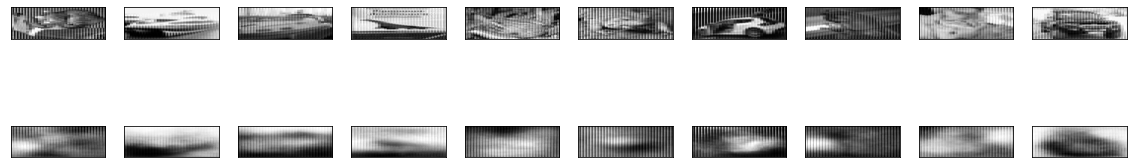

In [7]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

n = 10 
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(32, 96))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(32, 96))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

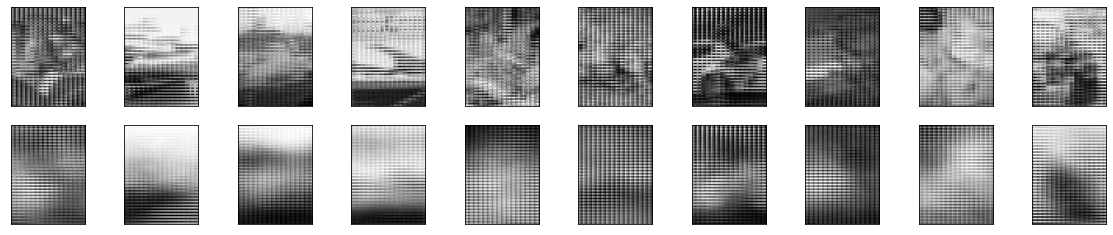

In [8]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

n = 10 
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(64, 48))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(64, 48))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()